model agnostic

In [1]:
# !pip install pip install -U pyartemis

In [2]:
from util_comp import *
from scipy.cluster.hierarchy import dendrogram , linkage , fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from artemis.interactions_methods.model_agnostic import FriedmanHStatisticMethod
from time import time

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random
import warnings

warnings.filterwarnings("ignore")

In [3]:
data = main(retained=True)

Elapsed time to compute age categorisation: 0 minutes and 0 seconds
Elapsed time to compute correct systematic error: 0 minutes and 11 seconds
Elapsed time to compute load column names: 0 minutes and 0 seconds
Elapsed time to compute clean data: 0 minutes and 0 seconds
Elapsed time to compute categorisation of outcome column: 0 minutes and 3 seconds
Elapsed time to compute change values in catagorical columns: 1 minutes and 50 seconds
Elapsed time to compute Full process: 2 minutes and 4 seconds


In [4]:
# drop rows where 'YEAR MMS' is 1 or 10
data = data[data['YEAR MMS'] != 1]
data = data[data['YEAR MMS'] != 10]

In [5]:
# drop column YEAR MMS
data = data.drop(columns=['YEAR MMS'])

In [6]:
data = pd.get_dummies(data)

In [7]:
# Splitting the data into X and y
X = data[(data['outcome'] == 0) | (data['outcome'] == 2)].drop('outcome',axis=1)
X.columns = [str(col) for col in X.columns]
y = data[(data['outcome'] == 0) | (data['outcome'] == 2)]['outcome']

In [8]:
# Balancing the data using SMOTE
X, y = smote(X, y)

y_train: 
2    24060
0    24060
Name: outcome, dtype: int64
Elapsed time to compute oversampling using SMOTE: 0 minutes and 0 seconds


In [9]:
# RF model
rf = RandomForestClassifier(class_weight='balanced')

rf.fit(X, y)

RandomForestClassifier(class_weight='balanced')

Fedmans H Statistics

In [10]:
# Get random selection of 100 observations

random.seed(42)
X_exp = random.choices(X.to_numpy(), k=100)
X_exp = pd.DataFrame(X_exp, columns=X.columns)

Unnormalised H-Statistic

In [11]:
h_stat_unnormalised = FriedmanHStatisticMethod(normalized=False)
t1 = time()
h_stat_unnormalised.fit(rf, X_exp, show_progress=True)
t2 = time()
print(time_e(t1, t2, 'Friedman H Statistic unnormalised'))

Calculating one vs all interactions: 100%|██████████| 333/333 [09:35<00:00,  1.73s/it]

Elapsed time to compute Friedman H Statistic unnormalised: 36 minutes and 42 seconds


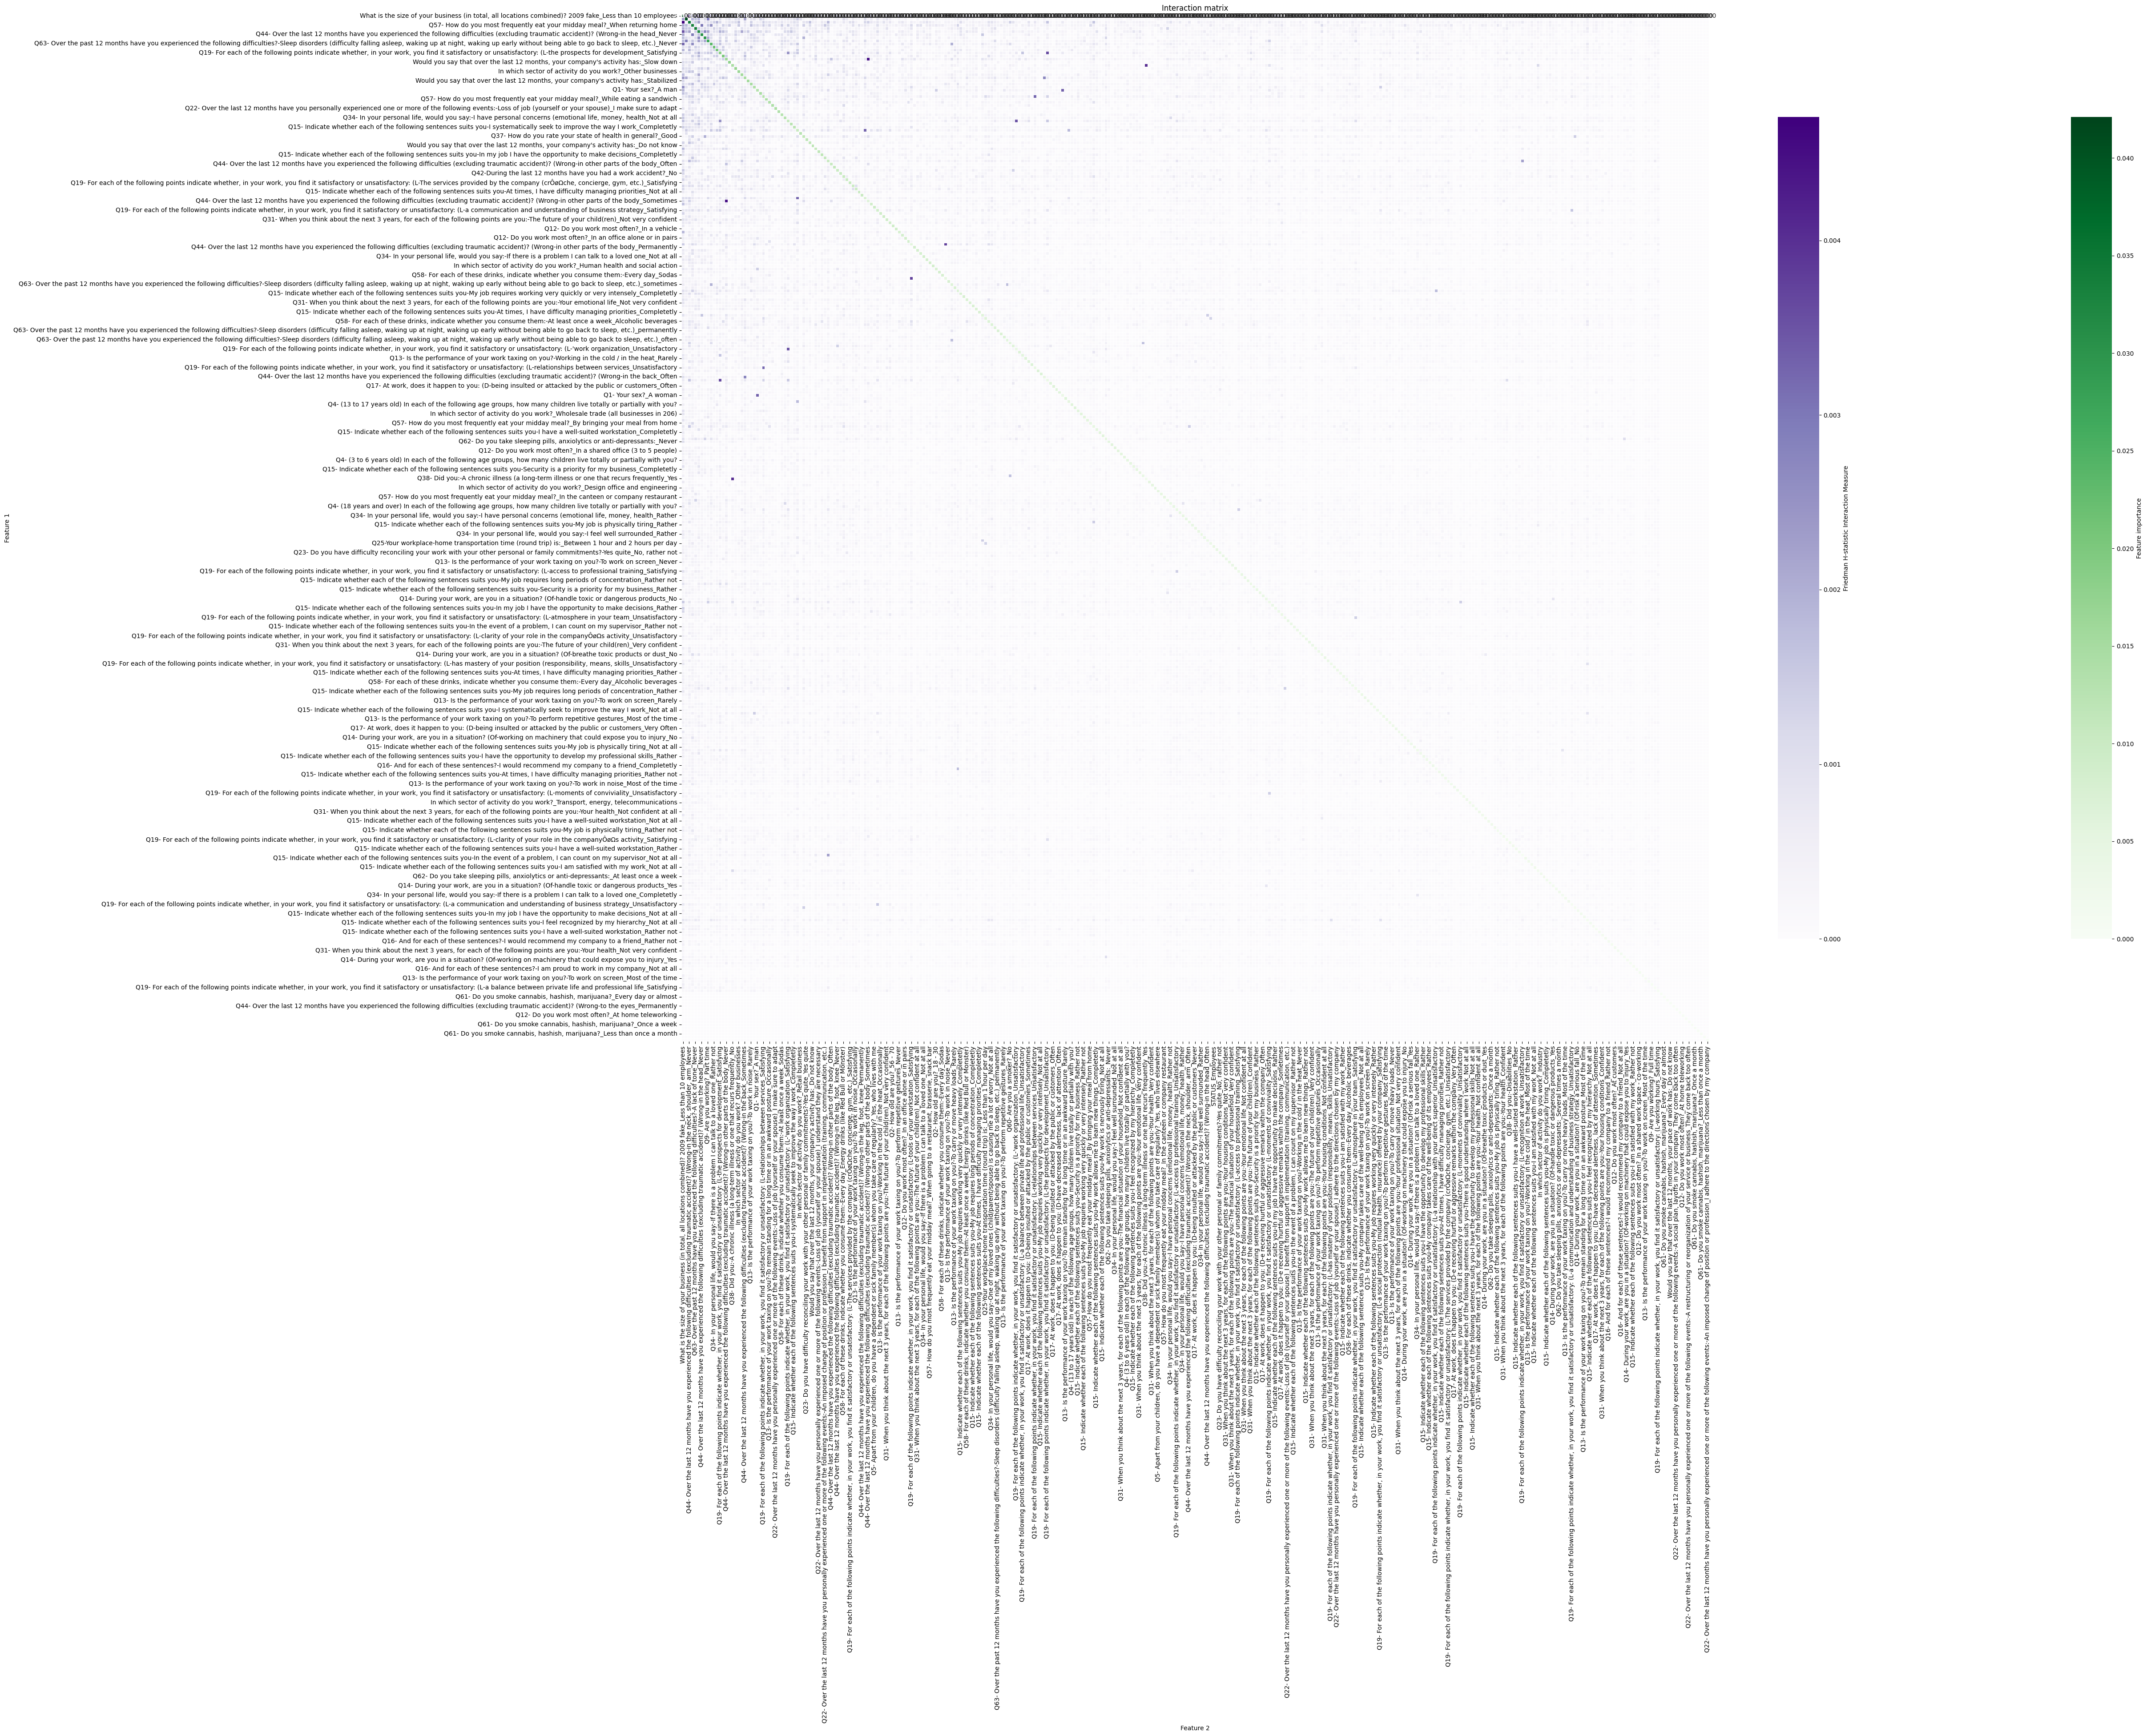

In [12]:
# Plot heatmap
fig, ax = plt.subplots(figsize=(50, 30))
h_stat_unnormalised.plot(ax=ax)

# save the plot
fig.savefig('outputs/01_02_02_hStat/hStat_heatmap_unnormalised.png', bbox_inches='tight')

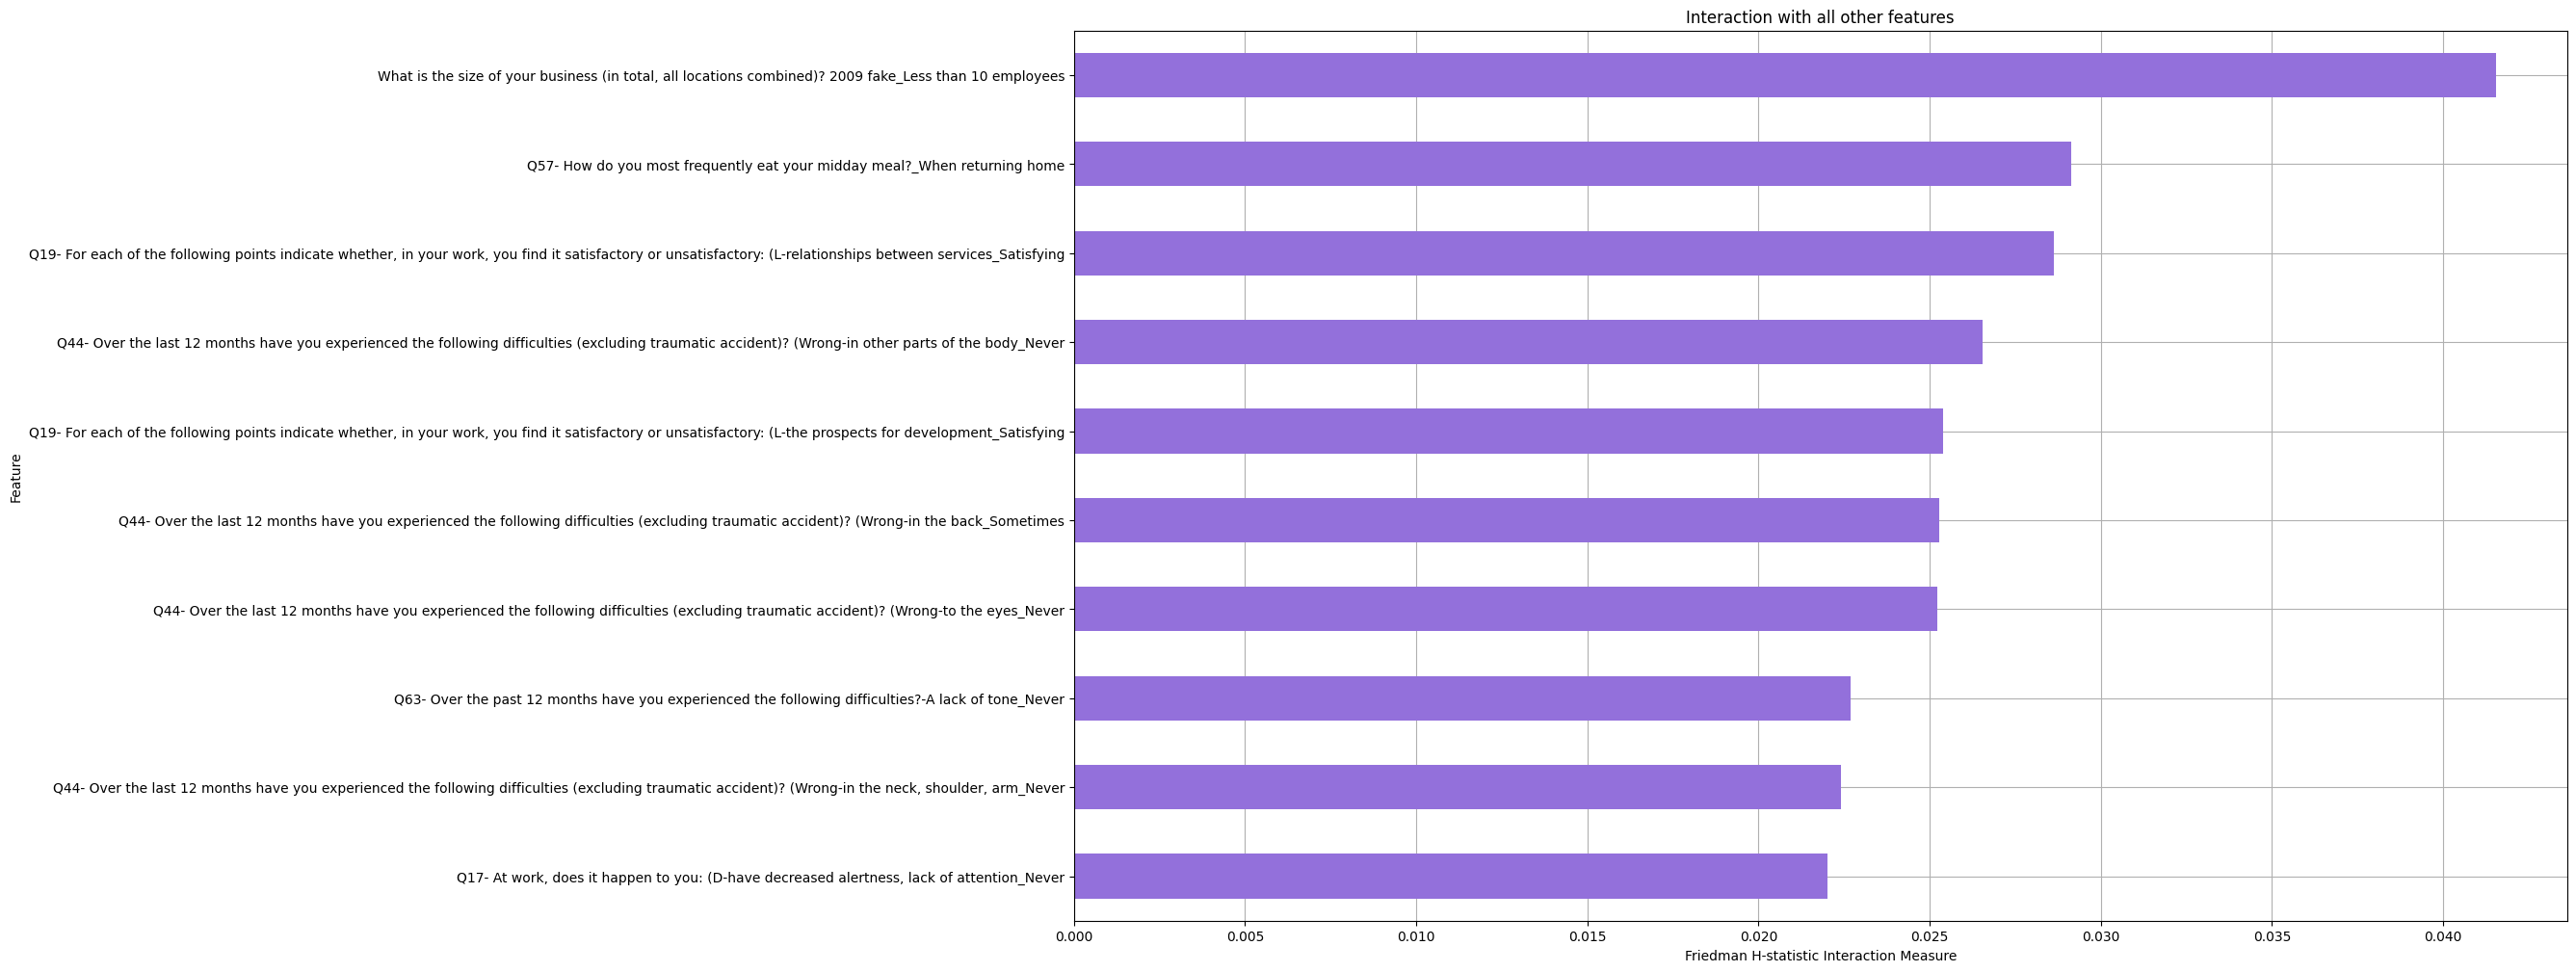

In [13]:
# Plot overall interactions
fig, ax = plt.subplots(figsize=(20, 12))
h_stat_unnormalised.plot(vis_type='bar_chart_ova', ax=ax)

# save the plot
plt.savefig('outputs/01_02_02_hStat/overall_interactions_unnormalised.png', bbox_inches='tight')

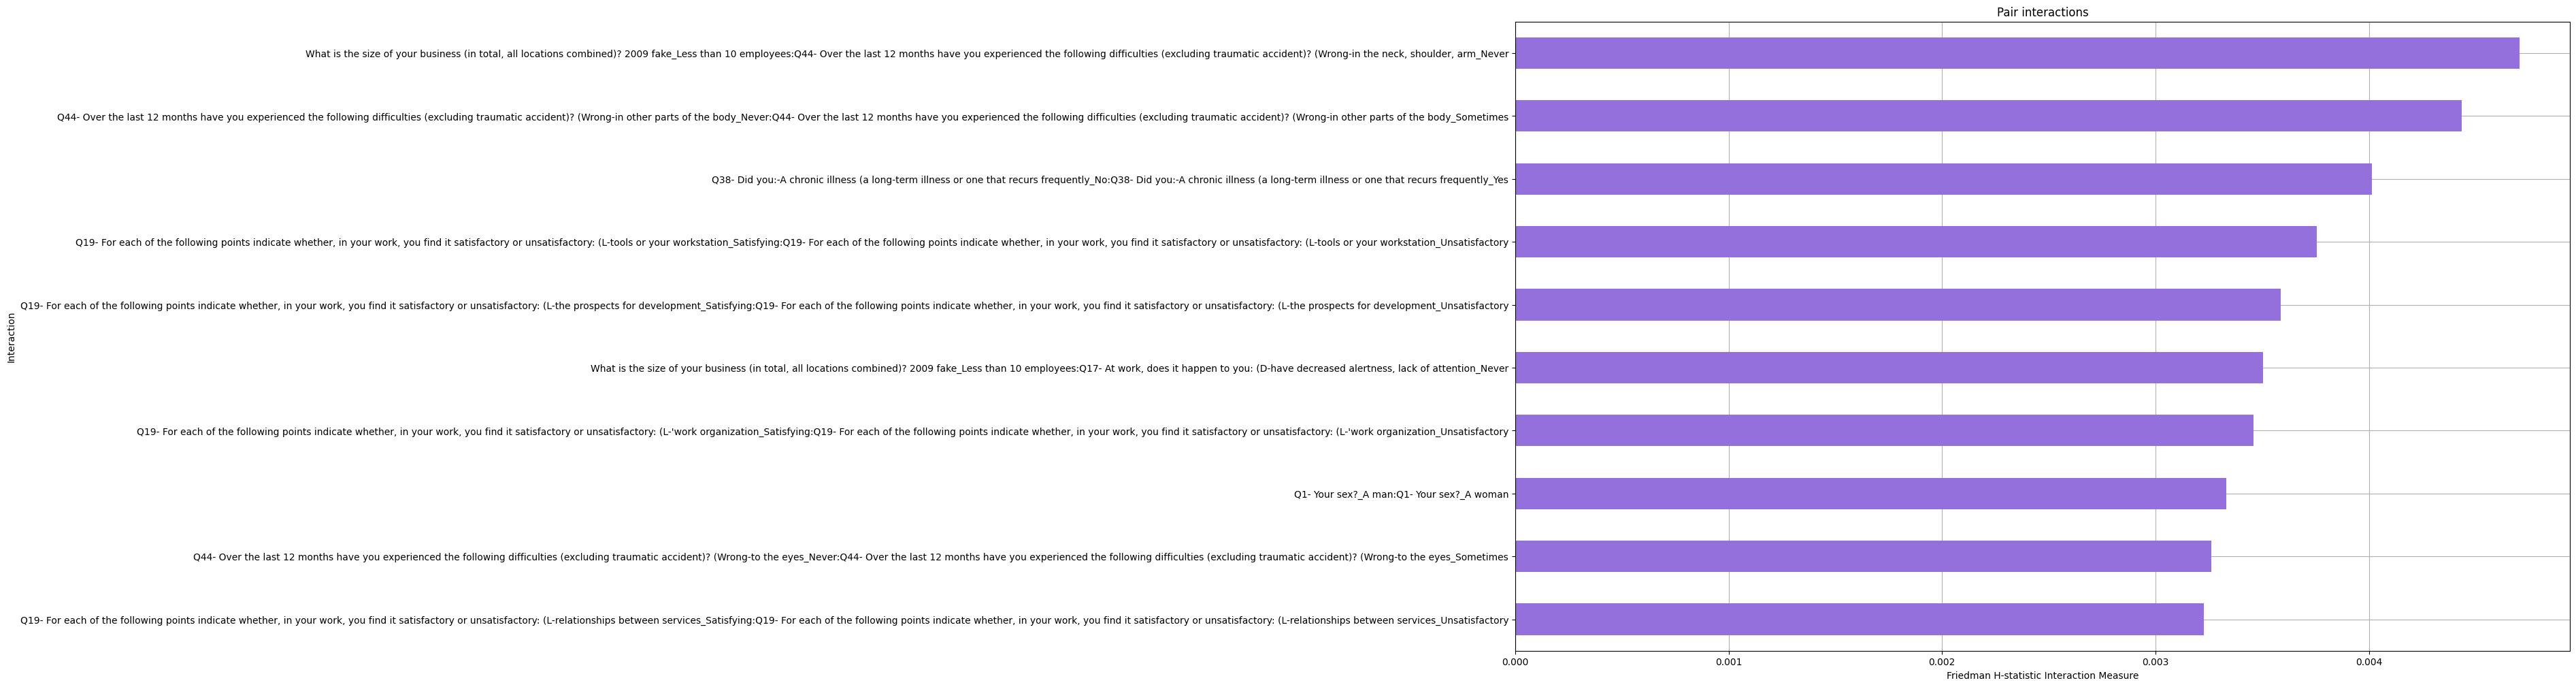

In [14]:
# Plot pairwise interactions
fig, ax = plt.subplots(figsize=(20, 12))
h_stat_unnormalised.plot(vis_type='bar_chart', ax=ax)

# save the plot
plt.savefig('outputs/01_02_02_hStat/pairwise_interactions_unnormalised.png', bbox_inches='tight')

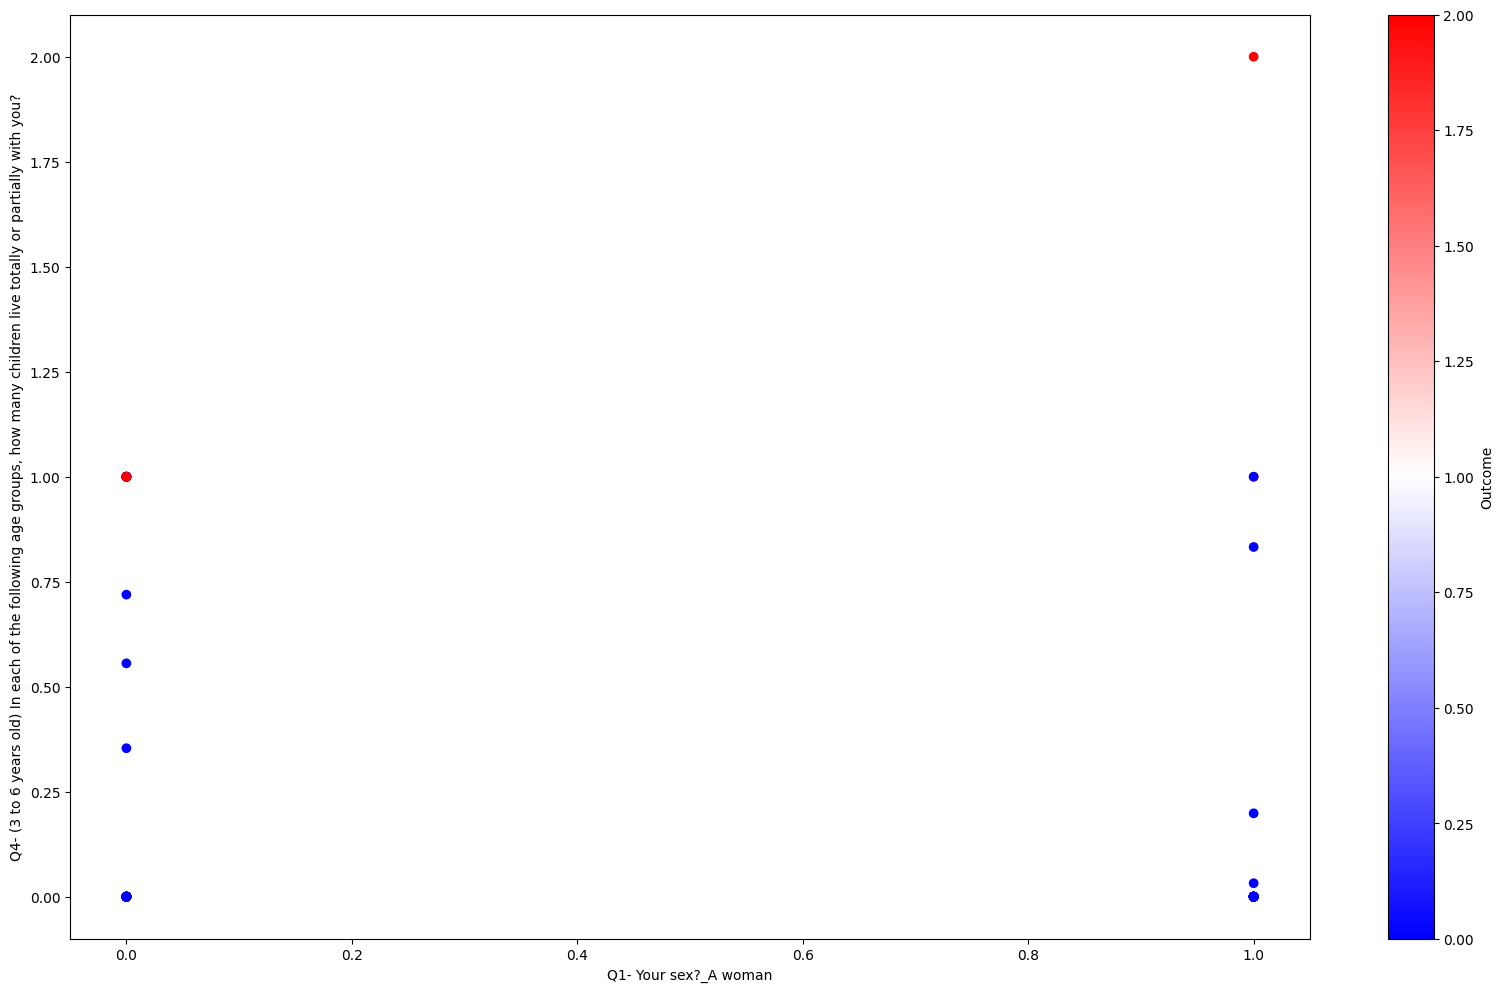

In [15]:
# Interaction between two features
fig, ax = plt.subplots(figsize=(20, 12))
plt.scatter(X_exp["Q1- Your sex?_A woman"], X_exp["Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?"], c=y[:100], cmap='bwr')
plt.colorbar(label='Outcome', orientation='vertical')
plt.xlabel("Q1- Your sex?_A woman")
plt.ylabel("Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?")
plt.savefig('outputs/01_02_02_hStat/interaction_between_two_features.png', bbox_inches='tight')
plt.show()

In [16]:
h_stat_unnormalised.feature_importance[:20]

Feature  Importance
0   What is the size of your business (in total, a...     0.04210
1   Q44- Over the last 12 months have you experien...     0.04130
2   Q44- Over the last 12 months have you experien...     0.03475
3   Q63- Over the past 12 months have you experien...     0.03380
4   Q57- How do you most frequently eat your midda...     0.03365
5   Q17- At work, does it happen to you: (D-have d...     0.03145
6   Q44- Over the last 12 months have you experien...     0.03035
7   Q37- How do you rate your state of health in g...     0.02955
8                      Q9- Are you working?_Part time     0.02655
9   Q63- Over the past 12 months have you experien...     0.02345
10  Q34- In your personal life, would you say:-If ...     0.02215
11                       Q2- How old are you?_45 - 49     0.02150
12  Would you say that over the last 12 months, yo...     0.01990
13  Q19- For each of the following points indicate...     0.01820
14  Would you say that over the last 12 months, yo...     0.01795
15  Would you say that over the last 12 months, yo...     0.01700
16  In which sector of activity do you work?_Other...     0.01645
17  Q44- Over the last 12 months have you experien...     0.01635
18  Would you say that over the last 12 months, yo...     0.01545
19  Would you say that over the last 12 months, yo...     0.01515